# Regularization(Ridge, Lasso, ElasticNet) - Cross Validation - Gridsearch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Advertising.csv'

In [ ]:
df.head()

In [ ]:
X = df.drop("sales", axis =1)
y = df["sales"]

### Polynomial Conversion

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

We create an artificial overfiting situation by taking poly feature from 5 degrees

In [ ]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [ ]:
poly_features.shape

### Train | Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data

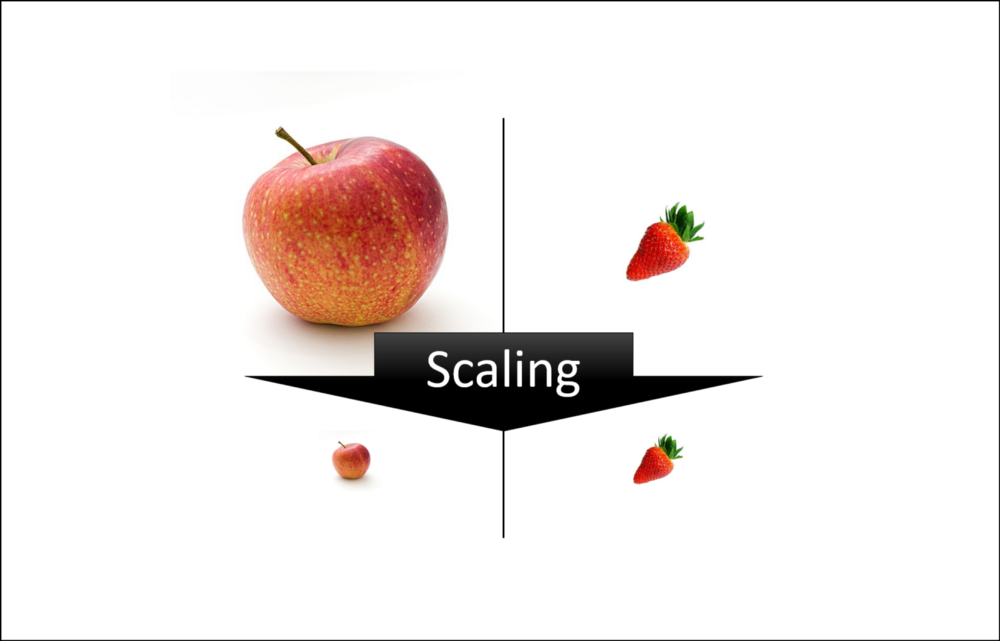

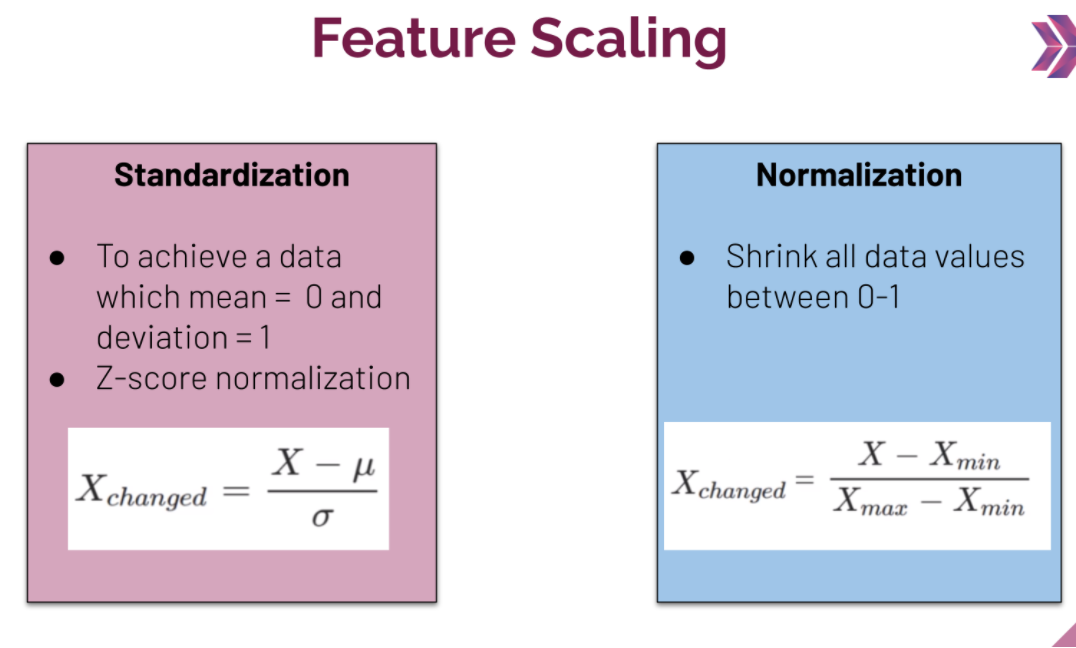

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score 

These values show where in the normal distribution they correspond to the z score.


In [ ]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

In [ ]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
lm.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

## Multicolineratiy

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [ ]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [ ]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

## Cross Validate

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

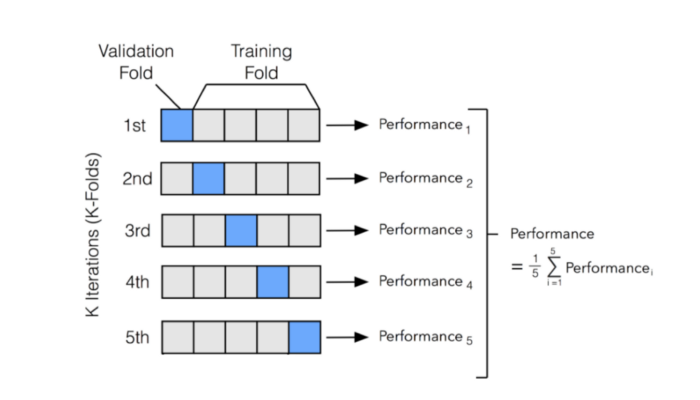

In [ ]:
#from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [ ]:
pd.DataFrame(scores, index = range(1,6))

In [ ]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

In [ ]:
sns.lineplot(data = scores.iloc[:,2:]);

In [ ]:
lm.coef_

In [ ]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

## Ridge Regression

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting. 

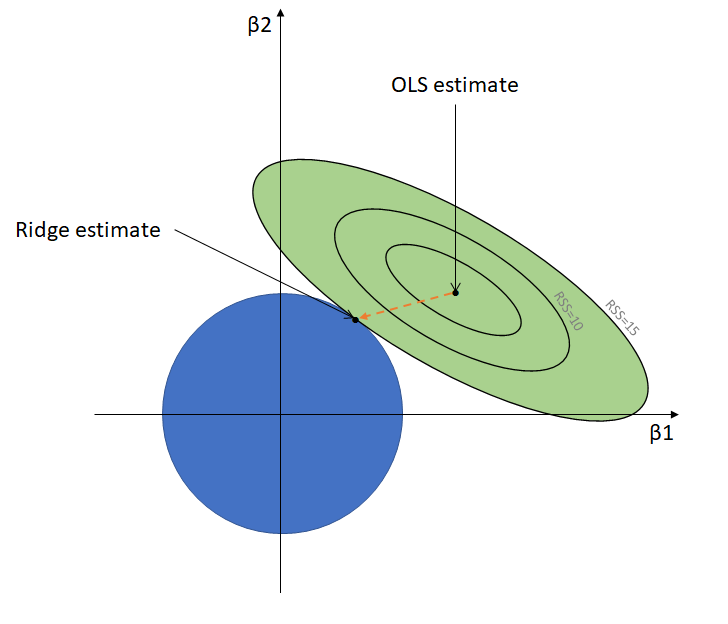

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1, random_state=42)

In [ ]:
ridge_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [ ]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

In [ ]:
pd.concat([ls, rs], axis=1)

## For Ridge Regression CV with alpha : 1 

In [ ]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
ridge_model.coef_

In [ ]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [ ]:
pd.concat([lm_df,rm_df], axis = 1)

## Choosing best alpha value with Cross-Validation

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

In [ ]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

In [ ]:
ridge_cv_model.alpha_

In [ ]:
ridge_cv_model.best_score_

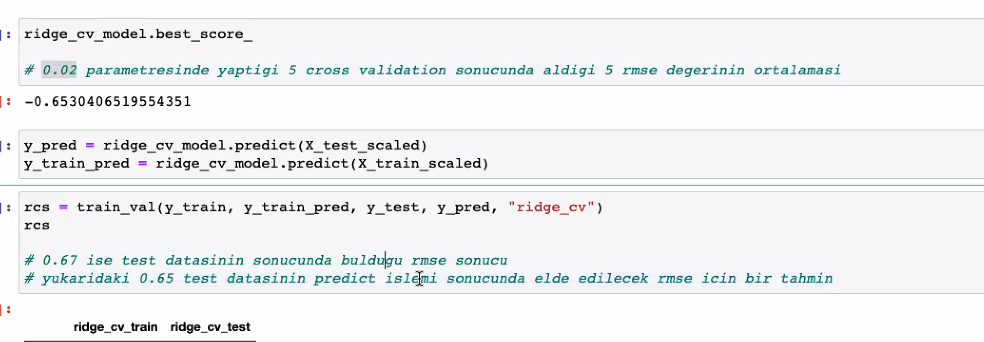

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

In [ ]:
pd.concat([ls, rs, rcs], axis = 1)

In [ ]:
ridge_cv_model.coef_

In [ ]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

In [ ]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

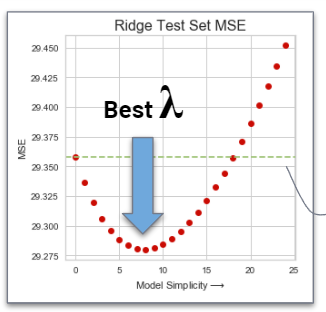

## LASSO

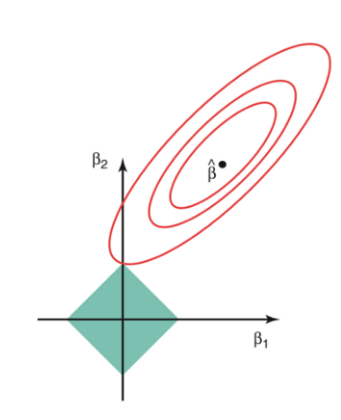

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

In [ ]:
pd.concat([ls, rs, rcs, lss], axis = 1)

## For Lasso CV with Default Alpha : 1

In [ ]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
lasso_model.coef_

In [ ]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

### Choosing best alpha value with Cross-Validation

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

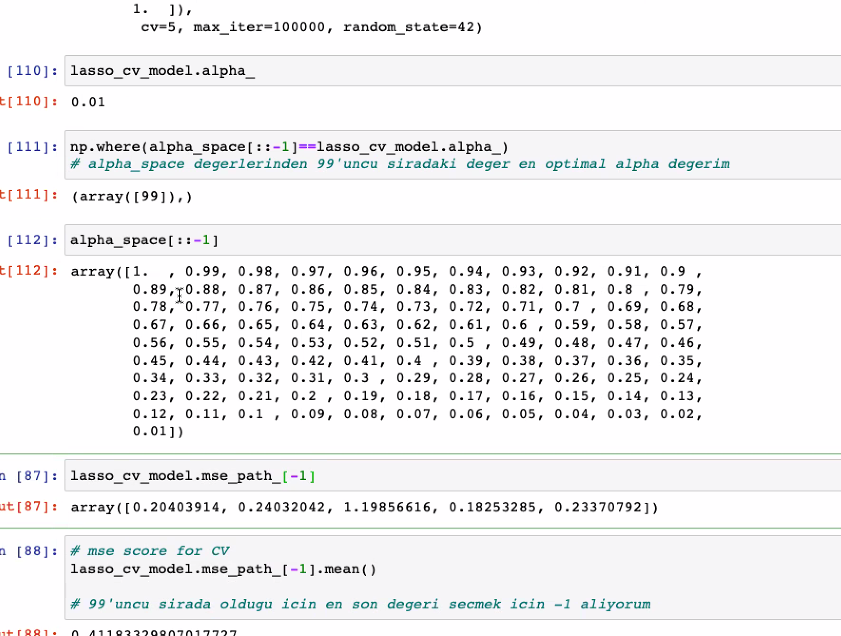

In [ ]:
lasso_cv_model.alpha_

In [ ]:
#np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

In [ ]:
alpha_space[::-1]

In [ ]:
#mse score for CV
lasso_cv_model.mse_path_[-1].mean()

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

In [ ]:
lasso_cv_model.coef_

In [ ]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

## Elastic net

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

In [ ]:
elastic_model.coef_

In [ ]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

### Choosing best alpha and l1_ratio values with Cross-Validation

In [ ]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [ ]:
elastic_cv_model.fit(X_train_scaled, y_train)

In [ ]:
elastic_cv_model.alpha_

In [ ]:
elastic_cv_model.l1_ratio_

In [ ]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

In [ ]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [ ]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

In [ ]:
elastic_cv_model.coef_

In [ ]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

## Grid Search

bütün modellerde kullanılabilir. bir modele ait degildir.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

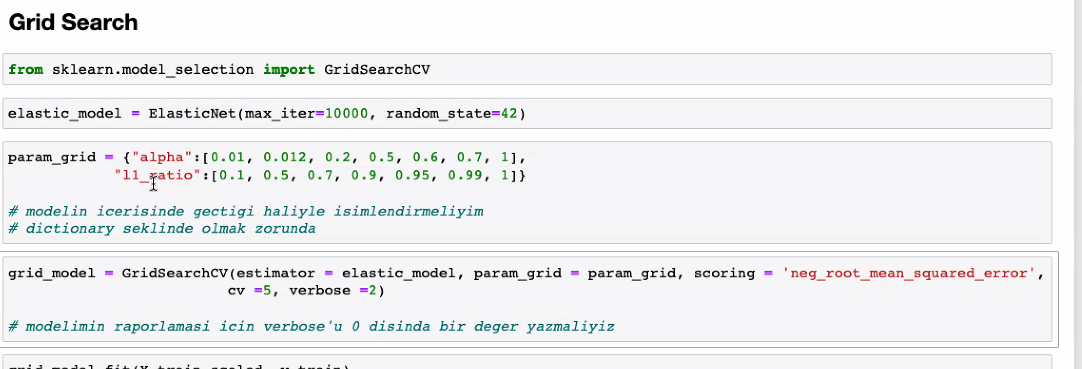


In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
pd.DataFrame(grid_model.cv_results_)

In [ ]:
grid_model.best_index_  # en iyi parametreleri aldıgı index i verir

In [ ]:
grid_model.best_score_

## Using Best Hyper Parameters From GridSearch

In [ ]:
y_pred = grid_model.predict(X_test_scaled)  # grid modelim artık elasticnet modeli gibi davranırız. ElasticNet(alpha = 0.01, l1_ratio = 0.1)
# diyerek dey yukarıda buldumuz en iyi scorları da elasticnetin içine atıp yazabişiriz.
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

## Final Model

In [4]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X_train)

NameError: name 'StandardScaler' is not defined

In [ ]:
final_model = Lasso(alpha=0.01) #lasso_cv_model

In [ ]:
final_model.fit(X_scaled, y)

## Feature importances with Ridge

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz  # grafigi büyütmek için import ettik

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))  #burada df olarak labelları x trainın degişkenlerin coeff lerine karışık gelen labelları aldık.
viz.fit(X_train, y_train)
viz.show()

## Feature importances with Lasso

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()